In [2]:
cd /content/drive/MyDrive/DataDreamworks/DataAnalysis_Marketing/CLV_analysis

/content/drive/MyDrive/DataDreamworks/DataAnalysis_Marketing/CLV_analysis


# **[1] 온라인 구매 내역 데이터**

---

* 🛍️ 구매내역 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|InvoiceNo|송장번호|
|StockCode|물품 고유코드|
|Description|제품 소개|
|Quantity|주문수량|
|InvoiceDate|주문 날짜 및 시간|
|UnitPrice|유닛 당 가격|
|CustomerID|고객 고유아이디|
|Country|고객 국가|

In [3]:
# 캐글 데이터 활용
# https://www.kaggle.com/datasets/puneetbhaya/online-retail
# 데이터 불러오기
import pandas as pd

data = pd.read_excel('Online Retail.xlsx')

In [4]:
data.iloc[:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [5]:
# 중복되는 데이터 제거
filtered_data = data[['Country', 'CustomerID']].drop_duplicates()

In [6]:
# 데이터 형태 확인
print(data.shape)
print(filtered_data.shape)

(541909, 8)
(4389, 2)


In [7]:
# 국가 별 고객수
filtered_data.Country.value_counts()

Country
United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Australia                  9
Netherlands                9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Israel                     5
Unspecified                5
Canada                     4
EIRE                       4
Greece                     4
USA                        4
Bahrain                    3
Malta                      2
United Arab Emirates       2
Iceland                    1
European Community         1
Brazil                     1
Lebanon                    1
Czech Republic             1
Saudi Arabia               1
Singap

<Axes: xlabel='Country'>

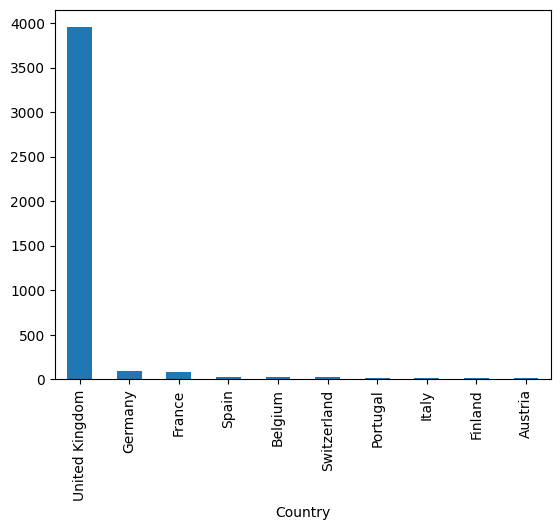

In [8]:
# EDA - 국가 별 고객수 바그래프
# 고객수가 많은 국가 순서대로 10개 국가까지
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [9]:
# 영국에서 주문된 내역만 필터링하기
uk_data = data[data.Country == 'United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [10]:
# 2010년 12월 1일부터 2011년 12월 9일까지의 구매 내역으로 구성되어 있음
# Quantity와 UnitPrice 음수인 경우가 있음 -> 이상 데이터
uk_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,495478.000000,495478,495478.000000,361878.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,227.588756,NaN,99.315438,1594.402590


In [11]:
print('Quantity가 음수인 경우: {0:,}(건)'.format(len(uk_data[(uk_data['Quantity'] < 0)])))
print('UnitPrice가 음수인 경우: {0:,}(건)'.format(len(uk_data[(uk_data['UnitPrice'] < 0)])))

Quantity가 음수인 경우: 9,192(건)
UnitPrice가 음수인 경우: 2(건)


In [12]:
# 이상치 데이터 지우기
# Quantity와 UnitPrice가 0 이상인 주문들만 선별하기
uk_data = uk_data[(uk_data['Quantity'] > 0) & (uk_data['UnitPrice'] > 0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485123 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    485123 non-null  object        
 1   StockCode    485123 non-null  object        
 2   Description  485123 non-null  object        
 3   Quantity     485123 non-null  int64         
 4   InvoiceDate  485123 non-null  datetime64[ns]
 5   UnitPrice    485123 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      485123 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.3+ MB


In [13]:
# 2010년 12월 1일부터 2011년 12월 9일까지의 구매 내역으로 구성되어 있음
# Quantity와 UnitPrice 음수인 경우가 있음 -> 이상 데이터
uk_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,485123.000000,485123,485123.000000,354321.000000
mean,9.610738,2011-07-04 12:35:09.919504896,3.849679,15552.486392
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-27 13:56:00,1.250000,14194.000000
50%,3.000000,2011-07-19 15:23:00,2.100000,15522.000000
75%,10.000000,2011-10-20 13:07:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,13541.330000,18287.000000
std,161.904143,NaN,34.677371,1594.527150


In [14]:
uk_data['YMD'] = uk_data['InvoiceDate'].dt.date
uk_data['YM'] = uk_data['InvoiceDate'].dt.strftime('%Y-%m')

In [15]:
uk_data.iloc[:3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YMD,YM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12


In [16]:
CountByYM = uk_data.groupby(['YM'])['InvoiceNo'].count().reset_index()
CountByYM.columns = ['YM', 'count']
CountByYM.iloc[:5]

,YM,count
0,2010-12,39224
1,2011-01,31164
2,2011-02,24850
3,2011-03,32612
4,2011-04,27281


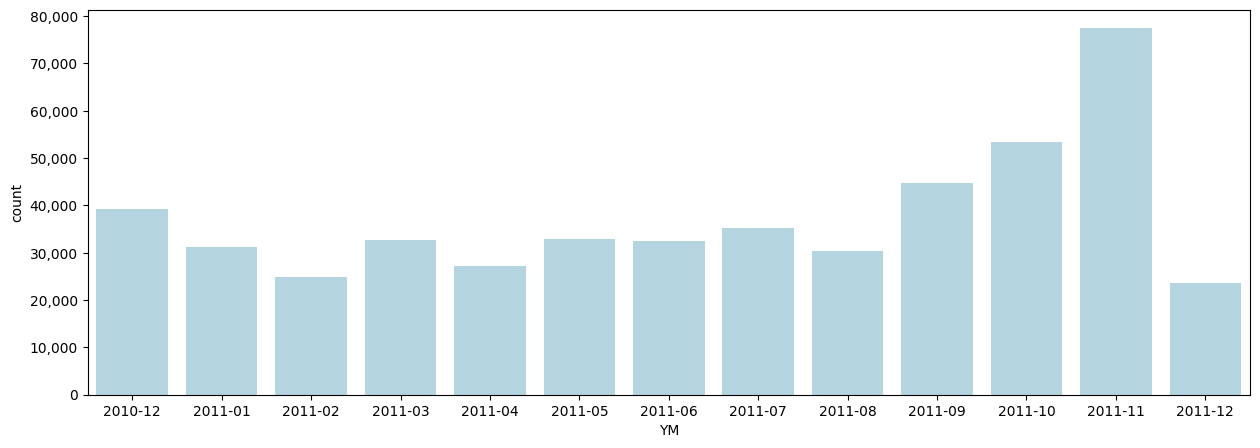

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(15, 5))

sns.barplot(data=CountByYM, x='YM', y='count', color = 'lightblue')

formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

In [18]:
# 2011년 거래내역만 추출하기
start_date = pd.to_datetime('2011-01-01')
end_date = pd.to_datetime('2011-12-31')

filtered_uk_data = uk_data[(uk_data['InvoiceDate'] >= start_date) & (uk_data['InvoiceDate'] <= end_date)]

In [19]:
# 고유 고객수 확인하기 : 3,813명
print("2011년 고유 고객수 : {0:,}(명)".format(filtered_uk_data.CustomerID.nunique()))

2011년 고유 고객수 : 3,813(명)


In [20]:
filtered_uk_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,445899.000000,445899,445899.000000,330379.000000
mean,9.751603,2011-07-22 15:15:09.267794176,3.758368,15538.413537
min,1.000000,2011-01-04 10:00:00,0.001000,12346.000000
25%,1.000000,2011-04-21 18:06:00,1.250000,14180.000000
50%,3.000000,2011-08-07 13:31:00,2.080000,15505.000000
75%,10.000000,2011-10-26 13:31:00,4.130000,16923.000000
max,80995.000000,2011-12-09 12:49:00,11062.060000,18287.000000
std,168.542308,NaN,29.240141,1591.739251


In [21]:
filtered_uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445899 entries, 42481 to 541893
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    445899 non-null  object        
 1   StockCode    445899 non-null  object        
 2   Description  445899 non-null  object        
 3   Quantity     445899 non-null  int64         
 4   InvoiceDate  445899 non-null  datetime64[ns]
 5   UnitPrice    445899 non-null  float64       
 6   CustomerID   330379 non-null  float64       
 7   Country      445899 non-null  object        
 8   YMD          445899 non-null  object        
 9   YM           445899 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 37.4+ MB


In [22]:
# CLTV 계산에 필요한 컬럼만 선별하기
filtered_uk_data = filtered_uk_data[['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Quantity', 'UnitPrice']]

In [23]:
# Total Purchase 계산하기
filtered_uk_data['TotalPurchase'] = filtered_uk_data['Quantity'] * uk_data['UnitPrice']

# **[2] 전통적 방식의 CLV 계산**

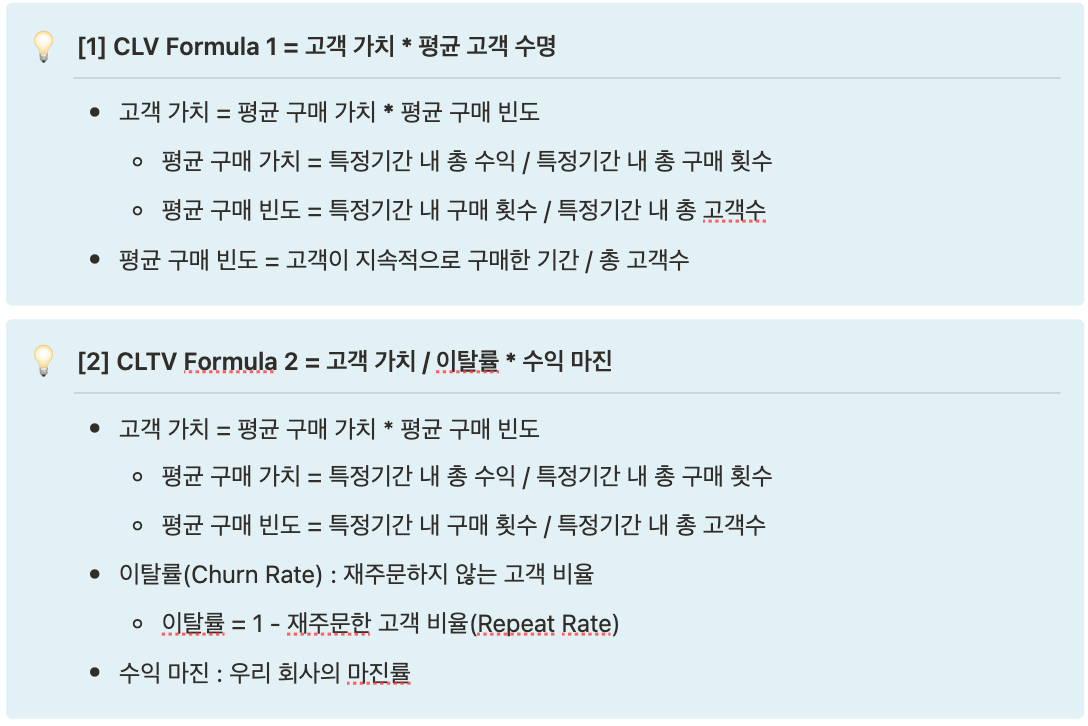

In [198]:
# Customer Id 마다 필요한 정보 요약하기
# 1) InvoceDate : 주문 마지막 날 - 주문 첫째날
# 2) InvoceNo : 총 주문건수
# 3) Quantity : 총 주문수량
# 4) TotalPurchase : 총 주문액

filtered_uk_data_group = filtered_uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                                                      'InvoiceNo': lambda num: len(num),
                                                                      'Quantity': lambda quant : quant.sum(),
                                                                      'TotalPurchase': lambda price: price.sum()})

In [199]:
filtered_uk_data_group.iloc[:5]

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,321,88,1062,3489.74
12748.0,337,3927,22906,29491.60
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [200]:
# 컬럼명 바꾸기
filtered_uk_data_group.columns = ['num_days', 'num_transactions', 'num_units', 'spent_money']
filtered_uk_data_group.iloc[:3]

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,321,88,1062,3489.74
12748.0,337,3927,22906,29491.60


In [201]:
# 평균 구매가치(Average Order Value) = 총 주문액 / 총 주문횟수
filtered_uk_data_group['avg_order_value'] = filtered_uk_data_group['spent_money']/filtered_uk_data_group['num_transactions']

In [202]:
# 고유 회원수, 5컬럼
filtered_uk_data_group.shape

(3813, 5)

In [203]:
# 평균 구매빈도(Purchase Frequency) = 총 주문수/고유 고객수
purchase_frequency = sum(filtered_uk_data_group['num_transactions'])/filtered_uk_data_group.shape[0]

In [204]:
# 재주문한 고객 비율 = 재주문한 고객수 / 총 고객수
# num_transactions이 1 이상인 경우 / 총 고객수
repeat_rate = filtered_uk_data_group[filtered_uk_data_group.num_transactions > 1].shape[0]/filtered_uk_data_group.shape[0]

In [205]:
# 이탈률(Churn Rate)
churn_rate = 1 - repeat_rate

In [206]:
# 주문 빈도, 재주문율, 이탈률
print('주문 빈도 : {0:,.2f}(번)'.format(purchase_frequency))
print('재주문율 : {0:,.2f}(%)'.format(repeat_rate*100))
print('이탈률 : {0:,.2f}(%)'.format(churn_rate*100))

주문 빈도 : 86.65(번)
재주문율 : 98.14(%)
이탈률 : 1.86(%)


In [207]:
# 이익마진 : (가정) 판매의 약 5%가 이익

filtered_uk_data_group['profit_margin'] = filtered_uk_data_group['spent_money'] * 0.05

In [208]:
# 고객 생애가치(이익마진 포함 안한 경우) = 평균 매출액 X 주문빈도
filtered_uk_data_group['CLV'] = (filtered_uk_data_group['avg_order_value'] * purchase_frequency)/churn_rate

In [209]:
# 고객 생애가치 = 고객가치 X 이익마진
filtered_uk_data_group['CLTV'] = filtered_uk_data_group['CLV'] * filtered_uk_data_group['profit_margin']

In [210]:
filtered_uk_data_group.iloc[:3]

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,CLTV
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.180,3.591527e+08,1.386035e+12
12747.0,321,88,1062,3489.74,39.656136,174.487,1.845289e+05,3.219790e+07
12748.0,337,3927,22906,29491.60,7.509957,1474.580,3.494552e+04,5.152997e+07


In [211]:
# CLTV 값 분포 살펴보기
filtered_uk_data_group['CLTV'].describe()

count    3.813000e+03
mean     1.028856e+09
std      4.217855e+10
min      3.271799e+03
25%      9.064433e+05
50%      2.490538e+06
75%      7.556013e+06
max      2.201207e+12
Name: CLTV, dtype: float64

In [212]:
# 고객 생애가치 등급화하기
filtered_uk_data_group['segment'] = pd.qcut(filtered_uk_data_group['CLTV'], 4, ['D','C','B','A'])

In [214]:
filtered_uk_data_group['segment'].unique()

['A', 'B', 'D', 'C']
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [215]:
# segment 값 재정렬
filtered_uk_data_group['segment'] = pd.Categorical(filtered_uk_data_group['segment'], categories=['A', 'B', 'C', 'D'], ordered=True)

In [217]:
filtered_uk_data_group.iloc[:3]

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,CLTV,segment
CustomerID,,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.180,3.591527e+08,1.386035e+12,A
12747.0,321,88,1062,3489.74,39.656136,174.487,1.845289e+05,3.219790e+07,A
12748.0,337,3927,22906,29491.60,7.509957,1474.580,3.494552e+04,5.152997e+07,A


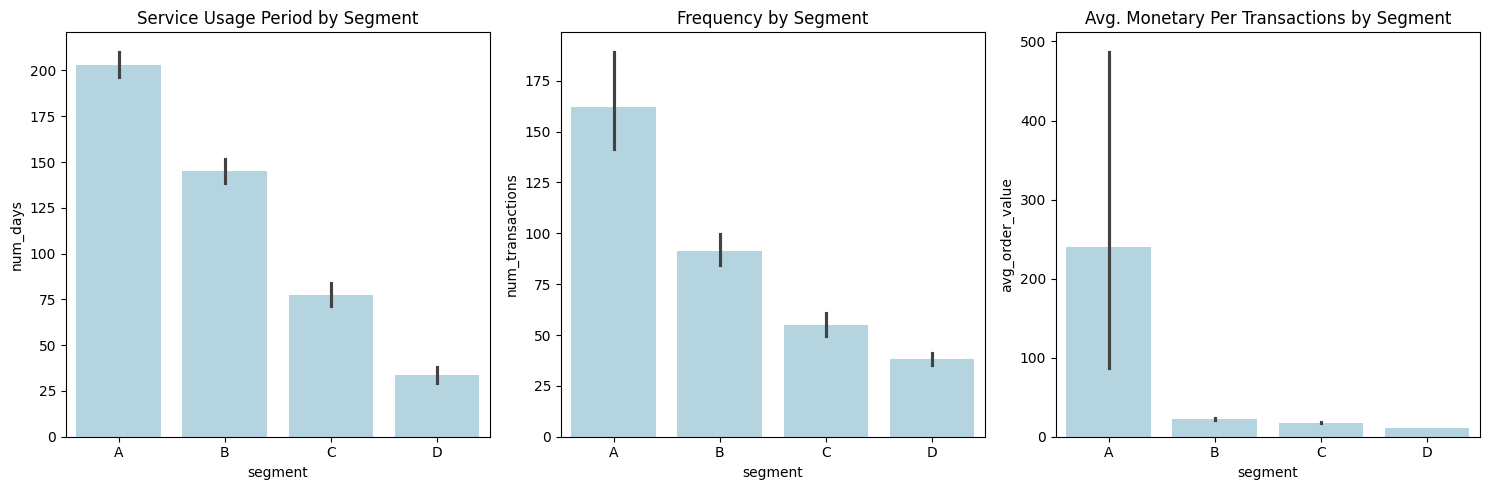

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=filtered_uk_data_group, x='segment', y='num_days', ax=ax1, color='lightblue')
sns.barplot(data=filtered_uk_data_group, x='segment', y='num_transactions', ax=ax2, color='lightblue')
sns.barplot(data=filtered_uk_data_group, x='segment', y='avg_order_value', ax=ax3, color='lightblue')

ax1.set_title('Service Usage Period by Segment')
ax2.set_title('Frequency by Segment')
ax3.set_title('Avg. Monetary Per Transactions by Segment')

formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [222]:
filtered_uk_data_group.to_csv("traditional_clv_240727.csv")

In [227]:
pd.set_option('display.max_columns', None)

In [229]:
filtered_uk_data_group[['segment', 'num_days', 'num_transactions', 'spent_money', 'avg_order_value']].groupby('segment').describe()

num_days                                                            \
           count        mean         std  min    25%    50%     75%    max   
segment                                                                      
A          953.0  203.147954  109.995627  0.0  125.0  235.0  295.00  338.0   
B          953.0  144.967471  106.804945  0.0   41.0  146.0  237.00  337.0   
C          953.0   77.593914   99.783567  0.0    0.0   13.0  151.00  334.0   
D          954.0   33.562893   71.429819  0.0    0.0    0.0   13.75  315.0   

        num_transactions                                                  \
                   count        mean         std  min   25%   50%    75%   
segment                                                                    
A                  953.0  162.140609  374.290992  1.0  32.0  98.0  177.0   
B                  953.0   91.309549  124.938429  1.0  31.0  54.0   94.0   
C                  953.0   54.882476   86.393975  1.0  16.0  25.0   51.0   
D                  954.0   38.299790   47.296771  1.0   9.0  20.5   51.0   

                spent_money                                              \
            max       count         mean           std     min      25%   
segment                                                                   
A        7560.0       953.0  5251.504408  13653.085883  204.00  1633.78   
B        1153.0       953.0  1149.082038    701.319060  104.00   682.81   
C         970.0       953.0   514.068469    345.981547   63.75   307.78   
D         436.0       954.0   230.674602    164.339154    3.75   123.90   

                                      avg_order_value              \
             50%       75%        max           count        mean   
segment                                                             
A        2593.07  4405.880  231822.69           953.0  240.054265   
B         992.50  1422.520    5045.61           953.0   22.390871   
C         409.57   616.260    3062.40           953.0   17.636127   
D         180.77   289.035    1122.53           954.0   11.075963   

                                                                          
                 std       min        25%        50%        75%      max  
segment                                                                   
A        3126.369955  4.413426  19.557670  28.636909  68.138472  77183.6  
B          18.748631  3.902680  15.026866  17.818361  23.171167    179.0  
C          11.427399  2.760622  11.478421  16.467619  19.914706    101.7  
D           7.704645  2.241000   5.132285   8.715148  15.499667     59.8

* 그룹 별 평균 ⬇

|Column|그룹 A|그룹 B|그룹 C|그룹 D|
|:---|:---|:---|:---|:---|
|서비스를 이용한 기간(일)|203|145|78|34|
|총 구매횟수(회)|162|91|55|38|
|총 구매금액(\$)|5252|1149|514|231|
|평균 구매금액(\$)|240|22|18|11|


# **[3] Regression model을 활용한 CLV 예측**
 - 2011년 1월~6월 데이터를 가지고, 2011년 전체 구매내역으로 계산한 CLV를 예측하는 선형회귀모델 만들기


In [143]:
# InvoceDate를 '연도-월'로 구성하기
filtered_uk_data['YM'] = filtered_uk_data['InvoiceDate'].dt.strftime('%Y-%m')

In [144]:
filtered_uk_data.iloc[:3]

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,YM
42481,13313.0,2011-01-04 10:00:00,539993,10,1.95,19.5,2011-01
42482,13313.0,2011-01-04 10:00:00,539993,25,0.42,10.5,2011-01
42483,13313.0,2011-01-04 10:00:00,539993,25,0.42,10.5,2011-01


In [145]:
# 각 고객 별 월 매출액 피벗 그리기
sale = filtered_uk_data.pivot_table(index=['CustomerID'], columns = ['YM'], values = 'TotalPurchase', aggfunc='sum', fill_value=0).reset_index()

In [146]:
sale.iloc[:2]

YM,CustomerID,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12346.0,77183.60,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1,12747.0,303.04,0.0,310.78,0.0,771.31,376.3,0.0,301.7,0.0,675.38,312.73,438.5


In [147]:
# 각 고객 별 총 매출액
sale['CLV'] = sale.iloc[:, 2:].sum(axis=1)

In [149]:
# 2011년 상반기 고객들의 주문내역(X값)을 토대로 2011년 구매내역으로 구한 CLV(Y값) 예측하기 위한 피처 선택
X = sale[['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06']]
Y=sale[['CLV']]

In [150]:
# train/test 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [151]:
# Linear Regression 모델 만들기
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [152]:
print(linreg.intercept_)
print(linreg.coef_)

[151.79464855]
[[0.03490171 1.37614073 2.43813922 0.94379145 5.32099309 1.66870805]]


In [153]:
# 최종 linear regression model 공식 만들기
intercept = linreg.intercept_[0]
coefficients = linreg.coef_[0]

period_feature = ['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06']

formula = f"y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    if coef >= 0:
        formula += f"+ {coef:.2f}*{period_feature[i]} "
    else:
      formula += f" {coef:.2f}*{period_feature[i]} "

formula = formula.strip()

print(formula)

y = 151.79 + 0.03*2011-01 + 1.38*2011-02 + 2.44*2011-03 + 0.94*2011-04 + 5.32*2011-05 + 1.67*2011-06


In [154]:
# R-square : 독립변수들이 종속변수를 얼마나 잘 설명하는지. 0~1 사이의 값을 가지마 1로 가까울 수록 신뢰도가 높다는 의미
# R-square 값이 0.74 라면 해당 모델이 데이터의 약 74%를 설명할 수 있다는 것을 의미

from sklearn import metrics
print('R-Square: {0:,.2f}'.format(metrics.r2_score(y_test, y_pred)))

R-Square: 0.74


In [156]:
sale['CLV'].describe()

count      3813.000000
mean       1669.955322
std        6744.096926
min           0.000000
25%         272.220000
50%         611.880000
75%        1448.210000
max      231822.690000
Name: CLV, dtype: float64

In [157]:
# MAE(Mean Absolute Error) : 모델의 예측값과 실제값 차이의 절대값의 평균
# MSE(Mean Squared Error) : 모델의 예측값과 실제값 차이의 제곱의 평균(제곱을 하기 때문에 이상치에 민감)
# RMSE(Root Mean Squared Error) : MSE에 루트를 취한 값(오류 지표를 실제값과 유사한 단위로 다시 변환하기 때문에 해석이 용이

import numpy as np
print('MAE: {0:,.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {0:,.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {0:,.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 886.64
MSE: 3,972,012.74
RMSE: 1,992.99


In [158]:
print(len(y_test))
print(len(y_pred))

954
954


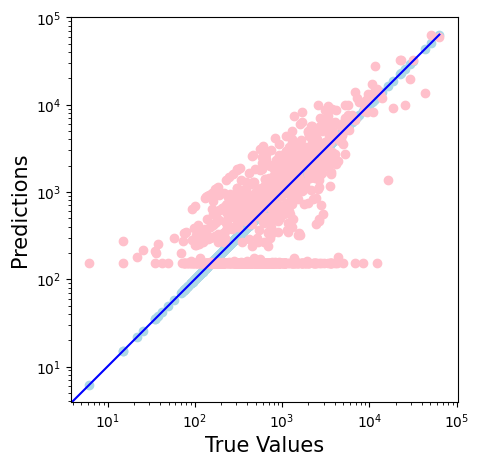

In [159]:
# 실제값과 linear regression model이 예측한 값
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_test.values.ravel(), y_test.values.ravel(), c='lightblue', label='True Values')
plt.scatter(y_test.values.ravel(), y_pred.ravel(), c='pink', label='Predictions')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred.ravel()), max(y_test.values.ravel()))
p2 = min(min(y_pred.ravel()), min(y_test.values.ravel()))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [108]:
import pickle

with open('RegressionModelForCLV_240727.pkl', 'wb') as f:
    pickle.dump(linreg, f)


In [109]:
with open('RegressionModelForCLV_240727.pkl', 'rb') as f:
    reg_model = pickle.load(f)

In [110]:
reg_model

LinearRegression()

# **[4] CLV BG-NBD model & Gamma-Gamma Model을 활용한 CLV 예측**

- <font color='blue'>**BG-NBD 모델**</font>은 각 고객의 구매 행동 분포를 모델링하고 각 고객의 예상 거래 수를 예측하고, <font color='blue'>**Gamma-Gamma 하위 모델**</font>은 예상 평균 이익 분포를 모델링하고 각 고객의 예상 평균 이익을 예측

## **[4-1] BG-NBD model**

In [ ]:
# 참고한 블로그
# https://medium.com/analytics-vidhya/customer-life-time-value-prediction-by-using-bg-nbd-gamma-gamma-models-and-applied-example-in-997a5ee481ad

In [24]:
filtered_uk_data.iloc[:3]

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
42481,13313.0,2011-01-04 10:00:00,539993,10,1.95,19.5
42482,13313.0,2011-01-04 10:00:00,539993,25,0.42,10.5
42483,13313.0,2011-01-04 10:00:00,539993,25,0.42,10.5


In [26]:
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00


In [317]:
# RFM-T format

data_summary_rfm = clv.utils.clv_summary(filtered_uk_data, 'CustomerID', 'InvoiceDate', 'TotalPurchase')
data_summary_rfm = data_summary_rfm.rename(columns={'CustomerID': 'customer_id'})
data_summary_rfm.index = data_summary_rfm['customer_id']


data_summary_rfm.rename(columns={'monetary_value': 'monetary'}, inplace=True)
data_summary_rfm = data_summary_rfm[data_summary_rfm['monetary'] > 0]

data_summary_rfm.head()

/usr/local/lib/python3.10/dist-packages/pymc_marketing/clv/utils.py:251: UserWarning: clv_summary was renamed to rfm_summary
  warnings.warn("clv_summary was renamed to rfm_summary", UserWarning, stacklevel=1)


,customer_id,frequency,recency,T,monetary
customer_id,,,,,
12747.0,12747.0,8.0,321.0,323.0,398.337500
12748.0,12748.0,98.0,338.0,338.0,298.370408
12749.0,12749.0,3.0,210.0,213.0,1077.260000
12820.0,12820.0,3.0,323.0,326.0,257.293333
12822.0,12822.0,1.0,17.0,87.0,257.980000


In [318]:
# 일(day) 단위를 일주일(week) 단위로 변환하기
data_summary_rfm['recency'] = data_summary_rfm['recency'] / 7
data_summary_rfm['T'] = data_summary_rfm['T'] / 7

data_summary_rfm = data_summary_rfm[(data_summary_rfm['frequency'] > 1)]

In [346]:
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(data_summary_rfm['frequency'], data_summary_rfm['recency'], data_summary_rfm['T'])

<lifetimes.BetaGeoFitter: fitted with 1645 subjects, a: 0.00, alpha: 6.90, b: 0.00, r: 1.11>

In [347]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.105063e+00,3.086154e-02,1.044574e+00,1.165552e+00
alpha,6.895149e+00,2.647332e-01,6.376272e+00,7.414026e+00
a,1.262635e-17,3.959618e-13,-7.760725e-13,7.760978e-13
b,1.284219e-06,3.898646e-02,-7.641217e-02,7.641474e-02


In [348]:
# 모델 저장하기
bgf.save_model('bgf.pkl')

In [349]:
# 모델 불러오기
#bgf_loaded = BetaGeoFitter()
#bgf_loaded.load_model('bgf.pkl')
#bgf_loaded

In [350]:
# 일주일 동안 가장 많은 구매를 할 것으로 예상되는 상위 고객 10명
bgf.conditional_expected_number_of_purchases_up_to_time(1, # week
                                                        data_summary_rfm['frequency'],
                                                        data_summary_rfm['recency'],
                                                        data_summary_rfm['T']).sort_values(ascending=False).head(10)

customer_id
17841.0    1.917895
12748.0    1.796004
14606.0    1.484084
15311.0    1.469804
12971.0    1.201080
13089.0    1.107360
13798.0    0.926137
14527.0    0.908015
16422.0    0.819526
14096.0    0.802161
dtype: float64

In [351]:
# 한 달 동안 가장 많은 구매를 할 것으로 예상되는 상위 고객 10명
bgf.conditional_expected_number_of_purchases_up_to_time(4, # 4 weeks = 1 month
                                                        data_summary_rfm['frequency'],
                                                        data_summary_rfm['recency'],
                                                        data_summary_rfm['T']).sort_values(ascending=False).head(10)


customer_id
17841.0    7.671578
12748.0    7.184017
14606.0    5.936337
15311.0    5.879217
12971.0    4.804321
13089.0    4.429439
13798.0    3.704550
14527.0    3.632061
16422.0    3.278103
14096.0    3.208645
dtype: float64

In [352]:
# 다음 6개월 동안 가장 많은 구매를 할 것으로 예상되는 상위 고객 10명
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 6,
                                                        data_summary_rfm['frequency'],
                                                        data_summary_rfm['recency'],
                                                        data_summary_rfm['T']).sort_values(ascending=False).head(10)

customer_id
17841.0    46.029470
12748.0    43.104101
14606.0    35.618022
15311.0    35.275300
12971.0    28.825926
13089.0    26.576632
13798.0    22.227298
14527.0    21.792365
16422.0    19.668618
14096.0    19.251871
dtype: float64

In [353]:
# 다음 6개월 동안 예상되는 총 거래 수
bgf.conditional_expected_number_of_purchases_up_to_time(4 * 6,
                                                        data_summary_rfm['frequency'],
                                                        data_summary_rfm['recency'],
                                                        data_summary_rfm['T']).sum()

6304.11565454746

## **[4-2] Gamma-Gamma model**

In [356]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(data_summary_rfm['frequency'], data_summary_rfm['monetary'])

<lifetimes.GammaGammaFitter: fitted with 1645 subjects, p: 3.76, q: 0.33, v: 3.70>

In [357]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,3.760582,0.127714,3.510263,4.010901
q,0.331794,0.009229,0.313705,0.349883
v,3.695259,0.128486,3.443427,3.947092


In [358]:
# 가장 가치 있을 것으로 예상되는 상위 고객 10명
ggf.conditional_expected_average_profit(data_summary_rfm['frequency'],
                                        data_summary_rfm['monetary']).sort_values(ascending=False).head(10)


customer_id
18102.0    9696.252229
17450.0    7006.012850
16684.0    4820.946145
14096.0    4117.390702
12931.0    4091.322933
14088.0    3968.707471
17511.0    3378.884938
13081.0    3290.182464
14607.0    2761.478935
15769.0    2703.525805
dtype: float64

In [359]:
# ggf 모델 저장하기
ggf.save_model('ggf.pkl')

In [360]:
# ggf 모델 불러오기
ggf_loaded = GammaGammaFitter()
ggf_loaded.load_model('ggf.pkl')
ggf_loaded

<lifetimes.GammaGammaFitter: fitted with 1645 subjects, p: 3.76, q: 0.33, v: 3.70>

## **[4-3] BG-NBD 모델과 GGF 모델을 활용하여 고객 생애가치 예측하기**

In [361]:
# 향후 3개월 동안 예상되는 고객 생애가치
data_summary_rfm['cltv_pred_3_months'] = ggf.customer_lifetime_value(bgf,
                                   data_summary_rfm['frequency'],
                                   data_summary_rfm['recency'],
                                   data_summary_rfm['T'],
                                   data_summary_rfm['monetary'],
                                   time=3,  # 3개월
                                   freq="W",  # 주 설정
                                   discount_rate=0.01)

In [362]:
data_summary_rfm.iloc[:10]

,customer_id,frequency,recency,T,monetary,cltv_pred_3_months,segment
customer_id,,,,,,,
12747.0,12747.0,8.0,45.857143,46.142857,398.337500,894.721086,B
12748.0,12748.0,98.0,48.285714,48.285714,298.370408,6861.021012,A
12749.0,12749.0,3.0,30.000000,30.428571,1077.260000,1611.203456,A
12820.0,12820.0,3.0,46.142857,46.571429,257.293333,269.611734,D
12823.0,12823.0,4.0,31.714286,42.285714,363.375000,505.683810,C
12826.0,12826.0,5.0,46.000000,46.285714,221.400000,337.875643,C
12827.0,12827.0,2.0,5.571429,6.285714,106.200000,356.969728,D
12828.0,12828.0,5.0,18.285714,18.571429,158.342000,505.283626,C
12830.0,12830.0,4.0,19.142857,24.428571,1148.200000,2504.441696,A


In [363]:
# 고객 생애가치 등급화하기
data_summary_rfm['segment'] = pd.qcut(data_summary_rfm['cltv_pred_3_months'], 4, ['D','C','B','A'])

data_summary_rfm.iloc[:10]

,customer_id,frequency,recency,T,monetary,cltv_pred_3_months,segment
customer_id,,,,,,,
12747.0,12747.0,8.0,45.857143,46.142857,398.337500,894.721086,B
12748.0,12748.0,98.0,48.285714,48.285714,298.370408,6861.021012,A
12749.0,12749.0,3.0,30.000000,30.428571,1077.260000,1611.203456,A
12820.0,12820.0,3.0,46.142857,46.571429,257.293333,269.611734,D
12823.0,12823.0,4.0,31.714286,42.285714,363.375000,505.683810,C
12826.0,12826.0,5.0,46.000000,46.285714,221.400000,337.875643,C
12827.0,12827.0,2.0,5.571429,6.285714,106.200000,356.969728,C
12828.0,12828.0,5.0,18.285714,18.571429,158.342000,505.283626,C
12830.0,12830.0,4.0,19.142857,24.428571,1148.200000,2504.441696,A


In [364]:
# segment 값 재정렬
data_summary_rfm['segment'] = pd.Categorical(data_summary_rfm['segment'], categories=['A', 'B', 'C', 'D'], ordered=True)

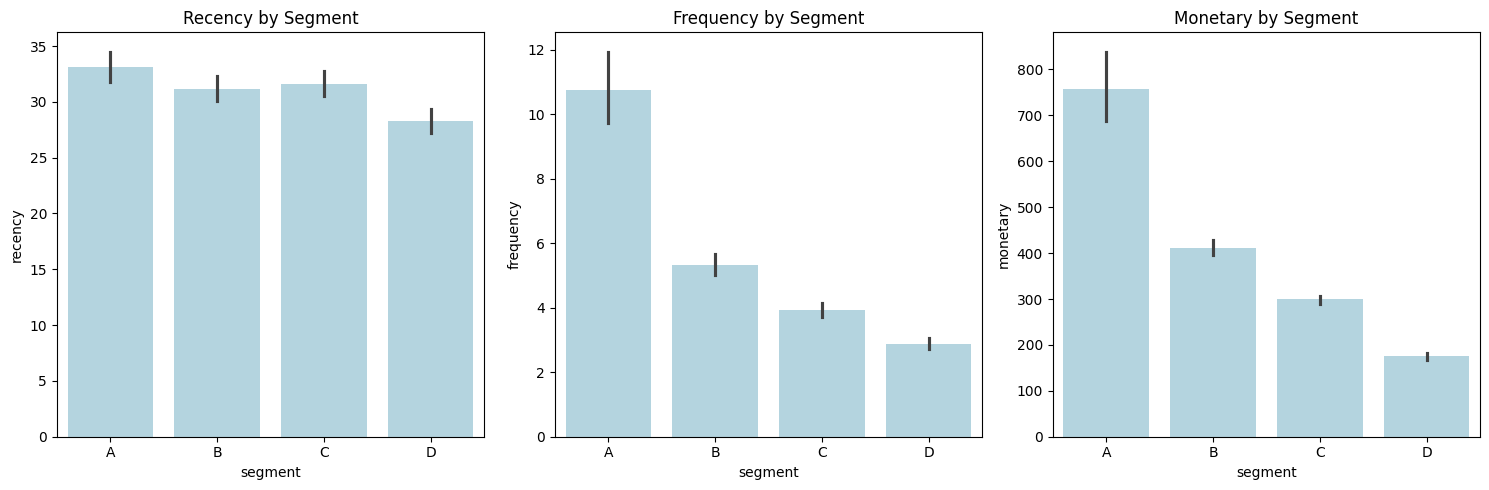

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=data_summary_rfm, x='segment', y='recency', ax=ax1, color='lightblue')
sns.barplot(data=data_summary_rfm, x='segment', y='frequency', ax=ax2, color='lightblue')
sns.barplot(data=data_summary_rfm, x='segment', y='monetary', ax=ax3, color='lightblue')

ax1.set_title('Recency by Segment')
ax2.set_title('Frequency by Segment')
ax3.set_title('Monetary by Segment')

formatter = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()